In [1]:
#Importing Packages
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
#Initializing th Classifier
classifier = Sequential()

In [3]:
#Defining Layers
classifier.add(Convolution2D(32,3,3, 
                             input_shape = (64,64,3), 
                             activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Convolution2D(32,3,3, 
                             activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Flatten())

classifier.add(Dense(output_dim = 128, activation='relu'))
classifier.add(Dense(output_dim = 1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
#Compiling NN
classifier.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
#Loading Data
train_set = train_datagen.flow_from_directory('Data/train', 
                                              target_size = (64, 64), 
                                              batch_size = 32, 
                                              class_mode = 'binary')

test_set = test_datagen.flow_from_directory('Data/valid', 
                                            target_size = (64, 64), 
                                            batch_size = 32, 
                                            class_mode = 'binary')

Found 22046 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


In [7]:
classifier.fit_generator(train_set, 
                         samples_per_epoch=8000, 
                         nb_epoch=25, 
                         validation_data=test_set, 
                         nb_val_samples=2000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
250/250 [==============================] - 202s 809ms/step - loss: 0.6893 - acc: 0.5397 - val_loss: 0.7103 - val_acc: 0.5394
Epoch 2/25
250/250 [==============================] - 197s 787ms/step - loss: 0.6811 - acc: 0.5603 - val_loss: 0.6611 - val_acc: 0.5997
Epoch 3/25
250/250 [==============================] - 197s 787ms/step - loss: 0.6633 - acc: 0.6049 - val_loss: 0.6192 - val_acc: 0.6605
Epoch 4/25
250/250 [==============================] - 197s 787ms/step - loss: 0.6522 - acc: 0.6165 - val_loss: 0.6095 - val_acc: 0.6790
Epoch 5/25
250/250 [==============================] - 197s 789ms/step - loss: 0.6192 - acc: 0.6555 - val_loss: 0.5347 - val_acc: 0.7269
Epoch 6/25
250/250 [==============================] - 197s 789ms/step - loss: 0.6127 - acc: 0.6642 - val_loss: 0.5191 - val_acc: 0.7360
Epoch 7/25
250/250 [==============================] - 197s 788ms/step - loss: 0.5106 - acc: 0.7512 - val_loss: 0.4182 - val_acc: 0.8049


Infected


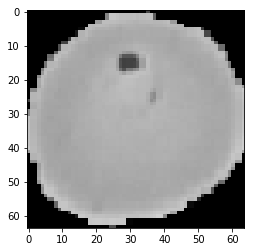

In [14]:
test_image1 = image.load_img('Data/random5.png', target_size = (64,64))
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
train_set.class_indices

if result[0][0]>=0.5:
    prediction='Not Infected'
else:
    prediction='Infected'
    
print(prediction)
plt.imshow(test_image1)